In [34]:
import gi
import cairo

gi.require_version('GLib', '2.0')
gi.require_version('GObject', '2.0')
gi.require_version('Gst', '1.0')
gi.require_version('Gtk', '3.0')
gi.require_version('GstVideo', '1.0')
from gi.repository import Gst
from gi.repository import Gtk
from gi.repository import GObject, GstVideo, GLib
import cairo
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cairo.__path__

['/usr/lib/python3/dist-packages/cairo']

In [4]:
import sys

In [5]:
sys.path

['/home/parallels/paarthurnax/g1',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/parallels/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.8/dist-packages',
 '/home/parallels/.local/lib/python3.8/site-packages/IPython/extensions',
 '/home/parallels/.ipython']

In [ ]:
cairo.ImageSurface.create_for_data

In [17]:
Gst.init()

[]

In [24]:
pipeline = 'filesrc location=./vid.webm ! decodebin name=dec ! videoconvert ! video/x-raw,width=512,height=512 ! cairooverlay name=tensor_res ! autovideosink'
 
# pipeline = ''

In [25]:
loop = GLib.MainLoop()
pipeline = Gst.parse_launch(pipeline)

In [26]:
tensor_res = pipeline.get_by_name('tensor_res')
tensor_res.connect('draw', draw_overlay_cb)

25

In [14]:
print(pipeline.get_by_name('dec'))

<__gi__.GstDecodeBin object at 0xffff4f0b7580 (GstDecodeBin at 0x30d4c5b0)>


In [26]:
pen_im = cv2.imread("./penguin.png", 0)

In [20]:
aaa = []

In [21]:
format = cairo.Format.RGB24
stride = format.stride_for_width(len(pen_im[0]))
surface = cairo.ImageSurface.create_for_data(
    aaa, format, len(pen_im[0]), len(pen_im))

TypeError: expected a writable bytes-like object

In [17]:
pen_im.shape

(502, 600, 3)

In [16]:
stride

2400

In [11]:
ctxt = cairo.Context()

TypeError: Context.__new__() argument 1 must be cairo.Surface, not numpy.ndarray

In [54]:
import numpy
import cairo
pen_im = cv2.imread("./penguin.png")
# width, height = 255, 255
width, height = pen_im.shape[:2]
# data = numpy.ndarray(shape=(height, width), dtype=numpy.uint32)
data = pen_im.astype(np.uint8)

surface = cairo.ImageSurface.create_for_data(
    data, cairo.FORMAT_A8, height, width)

In [55]:
pen_im.shape

(502, 600, 3)

In [56]:
surface

In [57]:
buf = surface.get_data()
print(buf)

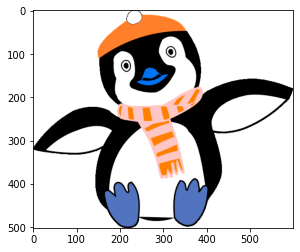

In [58]:
plt.imshow(data)

In [46]:
rdata = numpy.ndarray(shape=(width,height),
                     dtype=numpy.uint32,
                     buffer=buf)
plt.imshow(rdata)

TypeError: buffer is too small for requested array